# MPC - TP - Prediction by regression

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Load the data
ozone = pd.read_csv('ozone.txt', sep = ' ')
ozone
# y is the target variable, the other are predictive variables

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,87,15.6,18.5,18.4,4,4,8,0.6946,-1.7101,-0.6946,84
1,82,17.0,18.4,17.7,5,5,7,-4.3301,-4.0000,-3.0000,87
2,92,15.3,17.6,19.5,2,5,4,2.9544,1.8794,0.5209,82
3,114,16.2,19.7,22.5,1,1,0,0.9848,0.3473,-0.1736,92
4,94,17.4,20.5,20.4,8,8,7,-0.5000,-2.9544,-4.3301,114
...,...,...,...,...,...,...,...,...,...,...,...
96,84,13.3,17.7,17.8,3,5,6,0.0000,-1.0000,-1.2856,76
97,77,16.2,20.8,22.1,6,5,5,-0.6946,-2.0000,-1.3681,71
98,99,16.9,23.0,22.6,6,4,7,1.5000,0.8682,0.8682,77
99,83,16.9,19.8,22.1,6,5,3,-4.0000,-3.7588,-4.0000,99


In [5]:
# Number of examples (rows) and variables (columns)
num_examples, num_variables = ozone.shape
print(f"There are {num_examples} examples and {num_variables} variables (including the target one) in this dataset.")

#There are 101 examples(individu) and 11 variables (including the target one) in this dataset.

There are 101 examples and 11 variables (including the target one) in this dataset.


## Exercise 1 : Simple linear regression to predict y

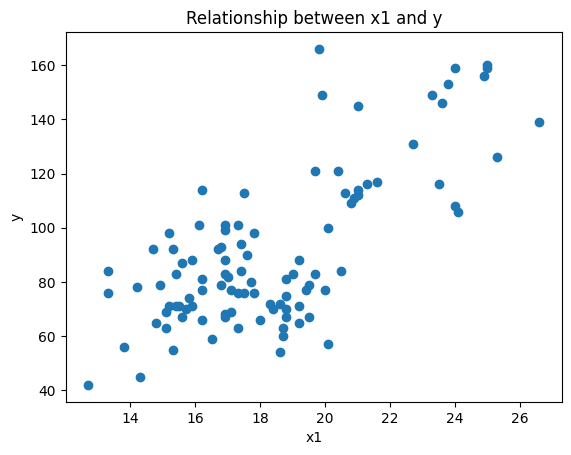

In [6]:
plt.scatter(ozone['x1'], ozone['y'])
plt.title('Relationship between x1 and y')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

In [ ]:
Oui, un modèle de regression linéaire peut aider à prédir y en utilisant x1

comment:
Based on the scatter plot from the previous cell, if there is a visible linear relationship between `x1` and `y`, a regression model might help predict `y` using `x1`. However, if the points are scattered without any clear trend, a simple linear regression model may not be effective. Further statistical analysis, such as checking the correlation coefficient, can provide more insights.

In [80]:
import statsmodels.api as sm
X = ozone['x1'] # Select the column containing the predictive variable
X = sm.add_constant(X) # add a constant column for the constant term of the model (for the parameter beta_0)
print(X) # you should see 2 columns in X : a constant one (const) with ones everywhere and another with the values of x1
Y = ozone['y'] # Select the target variable and store it in Y
model = sm.OLS(Y, X).fit() # fit the model to predict Y using X
model.summary()

     const    x1
0      1.0  15.6
1      1.0  17.0
2      1.0  15.3
3      1.0  16.2
4      1.0  17.4
..     ...   ...
96     1.0  13.3
97     1.0  16.2
98     1.0  16.9
99     1.0  16.9
100    1.0  15.7

[101 rows x 2 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     105.5
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           2.78e-17
Time:                        16:05:47   Log-Likelihood:                -444.69
No. Observations:                 101   AIC:                             893.4
Df Residuals:                      99   BIC:                             898.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.0106     12.221     -2.701      0.008     -57.259      -8.762
x1             6.7460      0.657     10.273      0.000       5.443       8.049
==============================================================================
Omnibus:                        2.779   Durbin-Watson:                   0.900
Prob(Omnibus):                  0.249   Jarque-Bera (JB):                2.289
Skew:                           0.360   Prob(JB):                        0.318
Kurtosis:                       3.163   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Extract coefficients
beta_0 = model.params['const']  # Intercept
beta_1 = model.params['x1']     # Coefficient for x1

# Equation of the model
print(f"The equation of the model is: y = {beta_0:.2f} + {beta_1:.2f} * x1")

# Influence of x1 on y
p_value_x1 = model.pvalues['x1']  # P-value for x1
if p_value_x1 < 0.05:
    print("x1 has a statistically significant influence on y.")
else:
    print("x1 does not have a statistically significant influence on y.")


#The equation of the model is: y = -33.01 + 6.75 * x1
#x1 has a statistically significant influence on y. x1 a une influence statistiquement significative sur y.

The equation of the model is: y = -33.01 + 6.75 * x1
x1 has a statistically significant influence on y.


In [ ]:
# Prediction for the first individual
x1_value = ozone.loc[0, 'x1']
predicted_y = beta_0 + beta_1 * x1_value
print(f"Prediction for the first individual: {predicted_y:.2f}")
#-33.01 + 6.75 * 15.6 = 72.77

# Residual (error) for the first individual
actual_y = ozone.loc[0, 'y']
residual = actual_y - predicted_y
print(f"Residual for the first individual: {residual:.2f}")
#87-72.23 =14.23

Prediction for the first individual: 72.23
Residual for the first individual: 14.77


In [9]:
# All the predictions made by the model on the dataset used to fit the model can be accessed by
model.fittedvalues
# Check that the fitted value for the first individual is equal to the one you computed above

0      72.226485
1      81.670840
2      70.202695
3      76.274066
4      84.369227
         ...    
96     56.710759
97     76.274066
98     80.996243
99     80.996243
100    72.901082
Length: 101, dtype: float64

In [10]:
# All the residuals made by the model on the dataset used to fit the model can be accessed by
model.resid
# Check that the residual for the first individual is equal to the one you computed above

0      14.773515
1       0.329160
2      21.797305
3      37.725934
4       9.630773
         ...    
96     27.289241
97      0.725934
98     18.003757
99      2.003757
100    -2.901082
Length: 101, dtype: float64

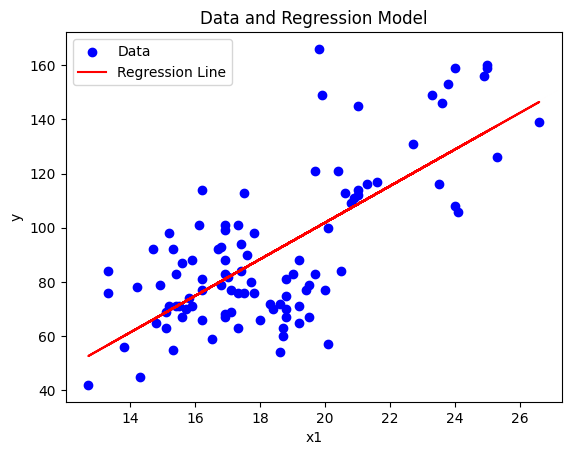

In [11]:
# Scatter plot for the data
plt.scatter(ozone['x1'], ozone['y'], label='Data', color='blue')

# Regression line
plt.plot(ozone['x1'], model.fittedvalues, label='Regression Line', color='red')

# Add labels and legend
plt.title('Data and Regression Model')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

In [12]:
# R^2 of the model
r_squared = model.rsquared
print(f"R^2 of the model: {r_squared:.4f}")

# Compute I_r (sum of squared residuals)
I_r = np.sum(model.resid ** 2)
print(f"I_r (sum of squared residuals): {I_r:.4f}")

# Compute I_t (total sum of squares)
mean_y = np.mean(Y)
I_t = np.sum((Y - mean_y) ** 2)
print(f"I_t (total sum of squares): {I_t:.4f}")

# Deduce I_m (explained sum of squares)
I_m = I_t - I_r
print(f"I_m (explained sum of squares): {I_m:.4f}")

R^2 of the model: 0.5160
I_r (sum of squared residuals): 39455.8049
I_t (total sum of squares): 81516.0594
I_m (explained sum of squares): 42060.2545


In [14]:
# Create the regression model for y using x4
X_x4 = ozone['x4']  # Select x4 as the predictive variable
X_x4 = sm.add_constant(X_x4)  # Add a constant column
Y = ozone['y']  # Target variable
model_x4 = sm.OLS(Y, X_x4).fit()  # Fit the model

# Extract the required quantities
r_squared_x4 = model_x4.rsquared  # R^2
I_r_x4 = np.sum(model_x4.resid ** 2)  # Sum of squared residuals (I_r)
p_value_x4 = model_x4.pvalues['x4']  # P-value for x4

# Print the results
print(f"R^2 for x4: {r_squared_x4:.4f}")
print(f"I_r for x4: {I_r_x4:.4f}")
print(f"P-value for x4: {p_value_x4:.4e}")

# Compare x1 and x4
if r_squared > r_squared_x4:
    print("x1 has a higher R^2 and is better at predicting y.")
else:
    print("x4 has a higher R^2 and is better at predicting y.")

R^2 for x4: 0.3782
I_r for x4: 50688.4199
P-value for x4: 7.8310e-12
x1 has a higher R^2 and is better at predicting y.


In [15]:
# Initialize variables to store the best variable and its metrics
best_variable = None
best_r_squared = -np.inf
best_I_r = np.inf
best_p_value = np.inf

# Iterate through all predictive variables (x1 to x10)
for i in range(1, 11):
    # Create the regression model for y using the current variable
    X_current = ozone.iloc[:, i]
    X_current = sm.add_constant(X_current)
    model_current = sm.OLS(Y, X_current).fit()
    
    # Extract the required metrics
    r_squared_current = model_current.rsquared
    I_r_current = np.sum(model_current.resid ** 2)
    p_value_current = model_current.pvalues[1]  # p-value for the predictive variable
    
    # Check if this variable is better based on the criteria
    if (r_squared_current > best_r_squared or
        (r_squared_current == best_r_squared and I_r_current < best_I_r) or
        (r_squared_current == best_r_squared and I_r_current == best_I_r and p_value_current < best_p_value)):
        best_variable = f"x{i}"
        best_r_squared = r_squared_current
        best_I_r = I_r_current
        best_p_value = p_value_current

# Print the best variable and its metrics
print(f"The best variable to predict y is {best_variable}.")
print(f"R^2: {best_r_squared:.4f}, I_r: {best_I_r:.4f}, p-value: {best_p_value:.4e}")

The best variable to predict y is x2.
R^2: 0.6129, I_r: 31555.3095, p-value: 4.0198e-22


C:\Users\PC\AppData\Local\Temp\ipykernel_24936\1553400274.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_current = model_current.pvalues[1]  # p-value for the predictive variable
C:\Users\PC\AppData\Local\Temp\ipykernel_24936\1553400274.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value_current = model_current.pvalues[1]  # p-value for the predictive variable
C:\Users\PC\AppData\Local\Temp\ipykernel_24936\1553400274.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame beh

In [16]:
# Let's load these new individuals.
ozone_new = pd.read_csv('ozone_n.txt', sep = ' ')
ozone_new

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,106,18.3,21.9,22.9,5,6,8,1.2856,-2.2981,-3.9392,101
1,60,13.7,14.0,15.8,4,5,4,0.0000,3.2139,0.0000,71
2,72,19.9,21.6,20.4,7,7,8,-3.0000,-4.5963,-5.1962,65
3,72,18.1,21.2,23.9,7,6,4,-2.5981,-3.9392,-3.7588,113
4,97,20.8,23.7,25.0,2,3,4,0.0000,1.7101,-2.7362,93
5,59,18.3,18.3,19.0,7,7,7,-3.9392,-1.9284,-1.7101,66
6,70,17.1,18.2,18.0,7,7,7,-4.3301,-7.8785,-5.1962,72
7,81,19.6,25.1,27.2,3,4,4,-1.9284,-2.5712,-4.3301,57
8,146,27.0,32.7,33.7,0,0,0,2.9544,6.5778,4.3301,121
9,78,17.7,20.2,21.5,5,5,3,0.0000,0.5209,0.0000,59


In [63]:
# I show you here how to predict the values of new data using a model
# First, we will fit a model to predict y using x1 with the ozone data as before (we don't use the new individuals to fit the model)
X = ozone.iloc[:,1] 
X = sm.add_constant(X) 
Y = ozone['y']
model = sm.OLS(Y, X).fit() 
# Then, we will prepare the new data so that it is under the same form as the data used to create the model,
# i.e. one constant column and one column with x1 values for the new data
X_new = ozone_new.iloc[:,1] # only the x1 column of the new dataset
X_new = sm.add_constant(X_new) # add the constant column
# and then we can easily predict y for this new dataset:
model.predict(X_new)
# You can see the predictions for the 10 individuals of ozone_new

0     90.440598
1     59.409146
2    101.234147
3     89.091404
4    107.305518
5     90.440598
6     82.345437
7     99.210356
8    149.130518
9     86.393017
dtype: float64

In [65]:
predictions = model.predict(X_new)
# Compute the mean squared error of the predictions
mse_predictions = np.mean((ozone_new['y'] - predictions) ** 2)
print(f"Mean Squared Error of the predictions: {mse_predictions:.4f}")

Mean Squared Error of the predictions: 304.8180


In [67]:
# Prepare the new data for the best model (x2)
X_new_best = ozone_new[['x2']]  # Select the x2 column of the new dataset
X_new_best = sm.add_constant(X_new_best)  # Add the constant column

# Predict y for the new dataset using the best model
predictions_best = model_current.predict(X_new_best)

# Compute the mean squared error for the best model
mse_best = np.mean((ozone_new['y']- predictions_best) ** 2)
print(f"Mean Squared Error for the best model (x2): {mse_best:.4f}")

# Compare the MSEs
if mse < mse_best:
    print("The model using x1 has a lower MSE and performs better.")
else:
    print("The model using x2 has a lower MSE and performs better.")

Mean Squared Error for the best model (x2): 2161.2276
The model using x1 has a lower MSE and performs better.


## Exercise 2: Multiple regression to predict y

In [25]:
X = ozone.iloc[:,[1,2]] # select columns of index 1 and 2 (i.e. x1 and x2)
X = sm.add_constant(X)
Y = ozone['y']
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     78.41
Date:                Wed, 09 Apr 2025   Prob (F-statistic):           4.62e-21
Time:                        10:29:18   Log-Likelihood:                -433.07
No. Observations:                 101   AIC:                             872.1
Df Residuals:                      98   BIC:                             880.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.8288     10.950     -3.089      0.003     -55.558     -12.100
x1             1.0269      1.279      0.803      0.424      -1.512       3.566
x2             4.9153      0.976      5.034      0.000       2.978       6.853
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   0.980
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.806
Skew:                           0.163   Prob(JB):                        0.668
Kurtosis:                       2.708   Cond. No.                         177.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Equation of the model
beta_0 = model.params['const']  # Intercept
beta_1 = model.params['x1']     # Coefficient for x1
beta_2 = model.params['x2']     # Coefficient for x2
print(f"The equation of the model is: y = {beta_0:.2f} + {beta_1:.2f} * x1 + {beta_2:.2f} * x2")

# Student's test result for x1
t_value_x1 = model.tvalues['x1']  # t-value for x1
p_value_x1 = model.pvalues['x1']  # p-value for x1
print(f"Student's test for x1: t-value = {t_value_x1:.2f}, p-value = {p_value_x1:.2e}")

# Interpretation of the result
if p_value_x1 < 0.05:
    print("x1 has a statistically significant influence on y.")
else:
    print("x1 does not have a statistically significant influence on y.")

The equation of the model is: y = -33.83 + 1.03 * x1 + 4.92 * x2
Student's test for x1: t-value = 0.80, p-value = 4.24e-01
x1 does not have a statistically significant influence on y.


In [27]:
 #What is the R^2 of this model ? Compare it with the model where x2 is alone to predict y. Conclusion
 # R^2 of the model
r_squared_combined = model.rsquared  # R^2 for the model using x1 and x2
print(f"R^2 of the model using x1 and x2: {r_squared_combined:.4f}")
print(f"R^2 of the model using x2 alone: {best_r_squared:.4f}")

# Compare R^2
if r_squared_combined > best_r_squared:
    print("The model using x1 and x2 has a higher R^2 and explains more variance in y.")
else:
    print("The model using x2 alone has a higher R^2 and explains more variance in y.")

#- What is I_r for this model ? Compare it with the model where x2 is alone to predict y. Conclusion 
# I_r of the model
I_r_combined = np.sum(model.resid ** 2)  # Sum of squared residuals for the model using x1 and x2
print(f"I_r of the model using x1 and x2: {I_r_combined:.4f}")
print(f"I_r of the model using x2 alone: {best_I_r:.4f}")

# Compare I_r
if I_r_combined < best_I_r:
    print("The model using x1 and x2 has a lower I_r and fits the data better.")
else:
    print("The model using x2 alone has a lower I_r and fits the data better.")

R^2 of the model using x1 and x2: 0.6154
R^2 of the model using x2 alone: 0.6129
The model using x1 and x2 has a higher R^2 and explains more variance in y.
I_r of the model using x1 and x2: 31349.2240
I_r of the model using x2 alone: 31555.3095
The model using x1 and x2 has a lower I_r and fits the data better.


In [34]:
# Prepare the new data for the model using x1 and x2
X_new_combined = ozone_new[['x1', 'x2']]  # Select the x1 and x2 columns of the new dataset
X_new_combined = sm.add_constant(X_new_combined)  # Add the constant column

# Predict y for the new dataset using the model with x1 and x2
predictions_combined = model.predict(X_new_combined)

# Compute the mean squared prediction error
mse_combined = np.mean((ozone_new['y'] - predictions_combined) ** 2)
print(f"Mean Squared Prediction Error for the model using x1 and x2: {mse_combined:.4f}")

# Conclusion
if mse_combined < mse_best:
    print("The model using x1 and x2 performs better than the model using x2 alone.")
else:
    print("The model using x2 alone performs better than the model using x1 and x2.")

Mean Squared Prediction Error for the model using x1 and x2: 225.9460
The model using x1 and x2 performs better than the model using x2 alone.


## Exercise 3 : Estimation of the generalization error by train / test split.

In [72]:
import statsmodels.api as sm

def my_regression(data, idx_p, idx_t):
    """
    Create a regression model to predict the target variable using the specified predictive variables.

    Parameters:
    - data: pandas DataFrame containing the dataset
    - idx_p: list of column indexes for the predictive variables
    - idx_t: column index for the target variable

    Returns:
    - model: the fitted regression model
    """
    # Select predictive variables and add a constant column
    X = data.iloc[:, idx_p]
    X = sm.add_constant(X)
    
    # Select the target variable
    Y = data.iloc[:, idx_t]
    
    # Fit the regression model
    model = sm.OLS(Y, X).fit()
    
    return model

In [84]:
def my_prediction(my_model, data):
    """
    Generate predictions using the given regression model for the provided dataset.
 
    Parameters:
    my_model (statsmodels.regression.linear_model.RegressionResultsWrapper): The regression model.
    data (pd.DataFrame): The dataset containing the variables.
 
    Returns:
    np.ndarray: Predictions made by the model.
    """
    # Get the names of the predictive variables used in the model
    predictive_vars = my_model.model.exog_names
   
    # Select the corresponding columns from the dataset
    # Ensure to exclude 'const' as it is added separately
    if 'const' in predictive_vars:
        predictive_vars.remove('const')
    X_new = data.loc[:, predictive_vars]
   
    # Add a constant column to the dataset
    X_new = sm.add_constant(X_new)
   
    # Generate predictions
    predictions = my_model.predict(X_new)
   
    return predictions

In [85]:
# Create a regression model using x2 and x3 as predictive variables
model_x2_x3 = my_regression(ozone, [2, 3], 0)

# Predict the individuals of ozone_new using the created model
predictions_x2_x3 = my_prediction(model_x2_x3, ozone_new)

# Display the predictions
print("Predictions for ozone_new using the model with x2 and x3:")
print(predictions_x2_x3)

Predictions for ozone_new using the model with x2 and x3:
0     92.662833
1     50.977049
2     86.655888
3     92.200491
4    103.117455
5     72.348636
6     70.015739
7    112.372807
8    151.820282
9     83.946060
dtype: float64


In [87]:
ozone = pd.concat([ozone, ozone_new], ignore_index=True)
# We now have 111 rows (101 + 10)

In [88]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(ozone, test_size = 0.25) 
# just need to give the input dataset (ozone here) and the fraction that you want in the test set (25% here)
# the two created datasets are called train and test as we have asked

In [89]:
# Check dimensions of train and test datasets
print(f"Train dataset dimensions: {train.shape}")
print(f"Test dataset dimensions: {test.shape}")

Train dataset dimensions: (83, 11)
Test dataset dimensions: (28, 11)


In [93]:
train , test = train_test_split(ozone, test_size = 0.25, random_state = 20) 
# now we will use these train and test sets until the end of this TP (unless specified)

In [94]:
def generalization_error_split(train, test, idx_p, idx_t):
    """
    Estimate the generalization error using a train/test split procedure.

    Parameters:
    - train: pandas DataFrame containing the training dataset
    - test: pandas DataFrame containing the testing dataset
    - idx_p: list of column indexes for the predictive variables
    - idx_t: column index for the target variable

    Returns:
    - mse: Mean Squared Error as the estimation of the generalization error
    """
    # Fit the regression model using the training data
    model = my_regression(train, idx_p, idx_t)
    
    # Predict the target variable for the test data
    predictions = my_prediction(model, test)
    
    # Compute the Mean Squared Error (MSE)
    actual_values = test.iloc[:, idx_t]
    mse = np.mean((actual_values - predictions) ** 2)
    
    return mse

# Apply the function to estimate the generalization error for predicting y using x1
mse_x1 = generalization_error_split(train, test, [1], 0)
print(f"Generalization error (MSE) for predicting y using x1: {mse_x1:.4f}")

Generalization error (MSE) for predicting y using x1: 349.8933


In [95]:
# Initialize variables to store the best variable and its generalization error
best_single_variable = None
lowest_generalization_error = np.inf

# Iterate through all predictive variables (x1 to x10)
for i in range(1, 11):
    # Compute the generalization error for the current variable
    generalization_error = generalization_error_split(train, test, [i], 0)
    
    # Check if this variable has the lowest generalization error
    if generalization_error < lowest_generalization_error:
        best_single_variable = f"x{i}"
        lowest_generalization_error = generalization_error

# Print the best variable and its generalization error
print(f"The best single variable to predict y is {best_single_variable}.")
print(f"The generalization error (MSE) for this variable is: {lowest_generalization_error:.4f}")

The best single variable to predict y is x10.
The generalization error (MSE) for this variable is: 229.4411


In [96]:
# Generalization error for the model using x2 only
mse_x2 = generalization_error_split(train, test, [2], 0)
print(f"Generalization error (MSE) for the model using x2 only: {mse_x2:.4f}")

# Generalization error for the model using x2 and x3
mse_x2_x3 = generalization_error_split(train, test, [2, 3], 0)
print(f"Generalization error (MSE) for the model using x2 and x3: {mse_x2_x3:.4f}")

# Compare the two models
if mse_x2_x3 < mse_x2:
    print("The model using x2 and x3 is better than the one using x2 only.")
else:
    print("The model using x2 only is better than the one using x2 and x3.")

Generalization error (MSE) for the model using x2 only: 306.7857
Generalization error (MSE) for the model using x2 and x3: 361.9298
The model using x2 only is better than the one using x2 and x3.


In [97]:
# Generalization error for the model using x2 only
mse_x2 = generalization_error_split(train, test, [2], 0)
print(f"Generalization error (MSE) for the model using x2 only: {mse_x2:.4f}")

# Generalization error for the model using all variables (x1 to x10)
mse_all_variables = generalization_error_split(train, test, list(range(1, 11)), 0)
print(f"Generalization error (MSE) for the model using all variables: {mse_all_variables:.4f}")

# Compare the two models
if mse_all_variables < mse_x2:
    print("The model using all variables (x1 to x10) is better than the one using x2 only.")
else:
    print("The model using x2 only is better than the one using all variables (x1 to x10).")

Generalization error (MSE) for the model using x2 only: 306.7857
Generalization error (MSE) for the model using all variables: 224.1848
The model using all variables (x1 to x10) is better than the one using x2 only.


In [98]:
# Generalization error for the model using all variables (x1 to x10)
mse_all_variables = generalization_error_split(train, test, list(range(1, 11)), 0)
print(f"Generalization error (MSE) for the model using all variables: {mse_all_variables:.4f}")

# Generalization error for the model using x2, x4, x8, x10
mse_selected_variables = generalization_error_split(train, test, [2, 4, 8, 10], 0)
print(f"Generalization error (MSE) for the model using x2, x4, x8, x10: {mse_selected_variables:.4f}")

# Compare the two models
if mse_selected_variables < mse_all_variables:
    print("The model using x2, x4, x8, x10 is better than the one using all variables.")
else:
    print("The model using all variables is better than the one using x2, x4, x8, x10.")

Generalization error (MSE) for the model using all variables: 224.1848
Generalization error (MSE) for the model using x2, x4, x8, x10: 151.0432
The model using x2, x4, x8, x10 is better than the one using all variables.
